In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from tqdm import tqdm

np.random.seed(27);
torch.manual_seed(27);

In [2]:
import logging
logging.getLogger().setLevel(logging.DEBUG)

%load_ext autoreload
%autoreload 2

In [81]:
DEVICE = 'cuda:0'

In [82]:
def model(v, sigma = .1):
    v = v * np.pi*2
    x = np.sin(v)**2
    return dict(x=x)

In [83]:
def noise(sim, v, sigma = 0.1):
    x = sim['x']
    x = x + np.random.randn(*x.shape) * sigma
    return dict(x=x)

In [84]:
zdim=3
v0 = np.ones(zdim)*0.25/2
obs0=model(v0)

In [85]:
prior = swyft.Prior.from_uv(lambda u: u, zdim)

In [86]:
sim = swyft.Simulator(model, sim_shapes = dict(x=(zdim,)))
store = swyft.MemoryStore(zdim, simulator = sim)

DEBUG:root:Creating new empty MemoryStore.
DEBUG:root:  params = ['z0', 'z1', 'z2']
INFO:root:Creating new store.
DEBUG:root:  sim_shapes = {'x': (3,)}


In [100]:
dataset = swyft.Dataset(4000, prior, store, simhook = noise)
dataset.simulate()

DEBUG:root:No simulations required.


In [101]:
post = swyft.Posteriors(dataset)
post.infer([0,], device = 'cuda')
post.infer([1,], device = 'cuda')
post.infer([2,], device = 'cuda')
post.infer([(0, 1, 2)], device = 'cuda')

DEBUG:root:Initializing swyft.Module with tag `DefaultHead`
DEBUG:root:  args = `()`
DEBUG:root:  kwargs = `{'obs_shapes': {'x': torch.Size([3])}, 'obs_transform': None, 'online_norm': True}`
DEBUG:root:Initializing swyft.Module with tag `DefaultTail`
DEBUG:root:  args = `(3, [(0,)])`
DEBUG:root:  kwargs = `{'n_tail_features': 2, 'p': 0.0, 'hidden_layers': [256, 256, 256], 'online_norm': True, 'param_transform': None, 'tail_features': False}`
DEBUG:root:Entering trainloop
DEBUG:root:  combinations = None
DEBUG:root:  batch_size = 32
DEBUG:root:  nworkers = 0
DEBUG:root:  max_epochs = 10
DEBUG:root:  early_stopping_patience = 1
DEBUG:root:  lr_schedule = [0.001, 0.0003, 0.0001]
DEBUG:root:  percent_validation = 0
DEBUG:root:lr: 0.001
DEBUG:root:validation loss = 1.386
DEBUG:root:validation loss = 1.271
DEBUG:root:validation loss = 1.159
DEBUG:root:validation loss = 1.108
DEBUG:root:validation loss = 1.042
DEBUG:root:validation loss = 1.03
DEBUG:root:validation loss = 1.029
DEBUG:root:va

In [102]:
samples = post.sample(500000, obs0)

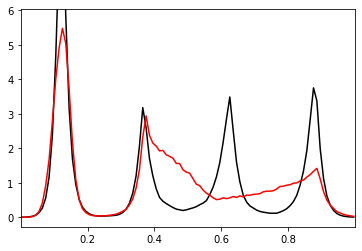

In [103]:
swyft.utils.plot_posterior(samples, [0], contours = False)
swyft.utils.plot_posterior(samples, [0], weights_key = (0,1, 2), color = 'r', contours = False)

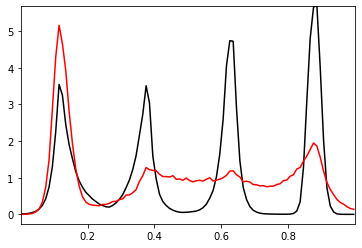

In [104]:
swyft.utils.plot_posterior(samples, [1], contours = False)
swyft.utils.plot_posterior(samples, [1], weights_key = (0, 1, 2), color = 'r', contours = False)

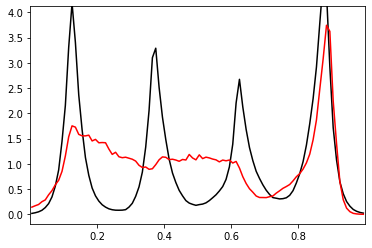

In [105]:
swyft.utils.plot_posterior(samples, [2], contours = False)
swyft.utils.plot_posterior(samples, [2], weights_key = (0, 1, 2), color = 'r', contours = False)

In [106]:
dataset = swyft.Dataset(20000, prior, store, simhook = noise)
dataset.simulate()

INFO:root:  adding 15863 new samples to simulator store.


In [107]:
post = swyft.Posteriors(dataset)
post.infer([0,], device = 'cuda')
post.infer([1,], device = 'cuda')
post.infer([2,], device = 'cuda')
post.infer([(0, 1, 2)], device = 'cuda')

DEBUG:root:Initializing swyft.Module with tag `DefaultHead`
DEBUG:root:  args = `()`
DEBUG:root:  kwargs = `{'obs_shapes': {'x': torch.Size([3])}, 'obs_transform': None, 'online_norm': True}`
DEBUG:root:Initializing swyft.Module with tag `DefaultTail`
DEBUG:root:  args = `(3, [(0,)])`
DEBUG:root:  kwargs = `{'n_tail_features': 2, 'p': 0.0, 'hidden_layers': [256, 256, 256], 'online_norm': True, 'param_transform': None, 'tail_features': False}`
DEBUG:root:Entering trainloop
DEBUG:root:  combinations = None
DEBUG:root:  batch_size = 32
DEBUG:root:  nworkers = 0
DEBUG:root:  max_epochs = 10
DEBUG:root:  early_stopping_patience = 1
DEBUG:root:  lr_schedule = [0.001, 0.0003, 0.0001]
DEBUG:root:  percent_validation = 0
DEBUG:root:lr: 0.001
DEBUG:root:validation loss = 0.9654
DEBUG:root:validation loss = 0.8655
DEBUG:root:validation loss = 0.8906
DEBUG:root:lr: 0.0003
DEBUG:root:validation loss = 0.8238
DEBUG:root:validation loss = 0.8519
DEBUG:root:lr: 0.0001
DEBUG:root:validation loss = 0.79

In [112]:
samples = post.sample(1000000, obs0)

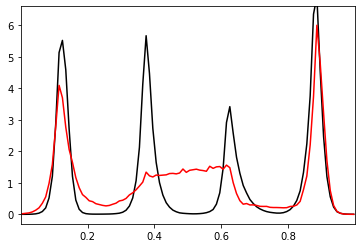

In [109]:
swyft.utils.plot_posterior(samples, [0], contours = False)
swyft.utils.plot_posterior(samples, [0], weights_key = (0,1, 2), color = 'r', contours = False)

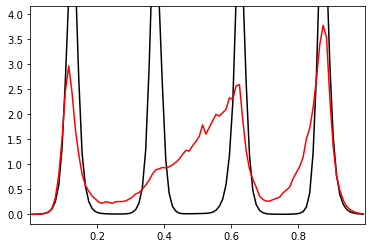

In [110]:
swyft.utils.plot_posterior(samples, [1], contours = False)
swyft.utils.plot_posterior(samples, [1], weights_key = (0, 1, 2), color = 'r', contours = False)

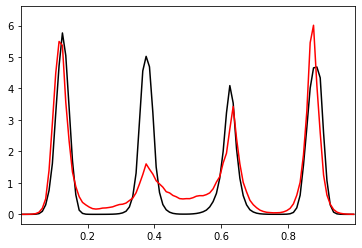

In [111]:
swyft.utils.plot_posterior(samples, [2], contours = False)
swyft.utils.plot_posterior(samples, [2], weights_key = (0, 1, 2), color = 'r', contours = False)